In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/Car Sale.csv')

In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

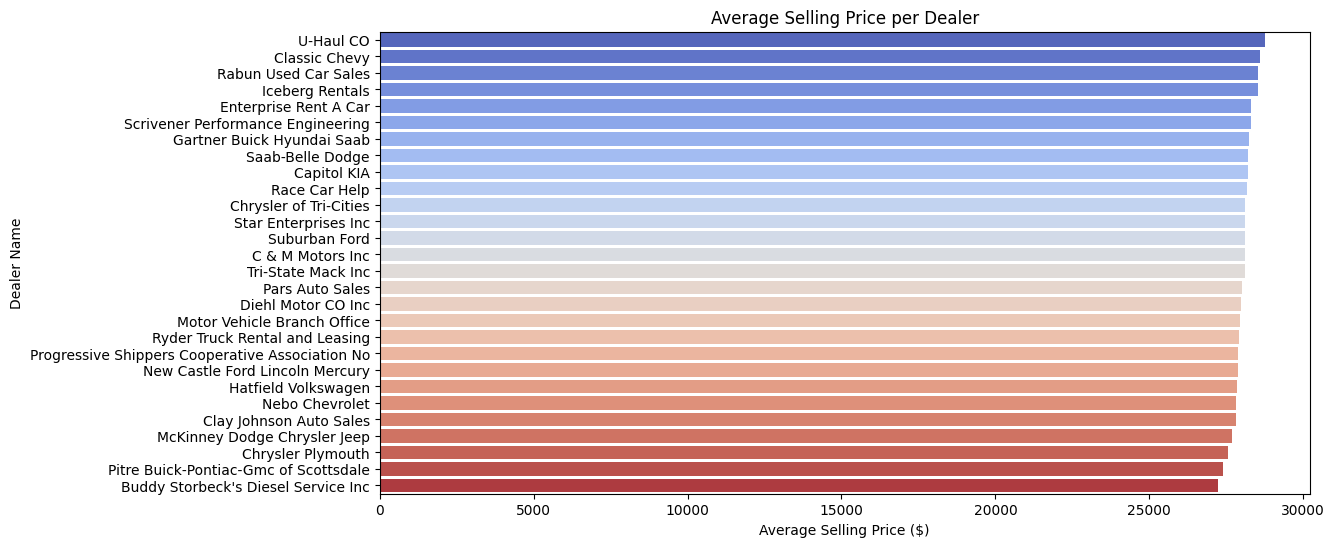

In [ ]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealers.

# Compute average selling price per dealer
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort by price for better visualization
dealer_avg_price = dealer_avg_price.sort_values(by='Price ($)', ascending=False)

# Display the result
print(dealer_avg_price)

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Price ($)', y='Dealer_Name', data=dealer_avg_price, palette='coolwarm')
plt.xlabel("Average Selling Price ($)")
plt.ylabel("Dealer Name")
plt.title("Average Selling Price per Dealer")
plt.show()

       Company  Price Std Dev
15     Lincoln   19658.050211
24        Saab   19653.740089
4     Cadillac   19517.120220
21    Plymouth   19065.997338
14       Lexus   17852.923492
3        Buick   17142.232626
17     Mercury   16445.172195
19      Nissan   16214.264017
25      Saturn   15990.223671
8         Ford   15849.090227
16  Mercedes-B   15722.807459
20  Oldsmobile   15711.345857
27      Toyota   15367.131714
2          BMW   15065.578723
22     Pontiac   14348.963592
11    Infiniti   13696.332844
5    Chevrolet   13311.063223
29       Volvo   12933.790185
26      Subaru   12920.771620
1         Audi   12904.243867
28  Volkswagen   12527.124011
18  Mitsubishi   11671.343035
6     Chrysler   11583.286811
7        Dodge   11187.592085
9        Honda   11148.629062
12      Jaguar   10222.531533
13        Jeep    9459.834418
0        Acura    8183.046414
23     Porsche    5261.839206
10     Hyundai    3485.982649


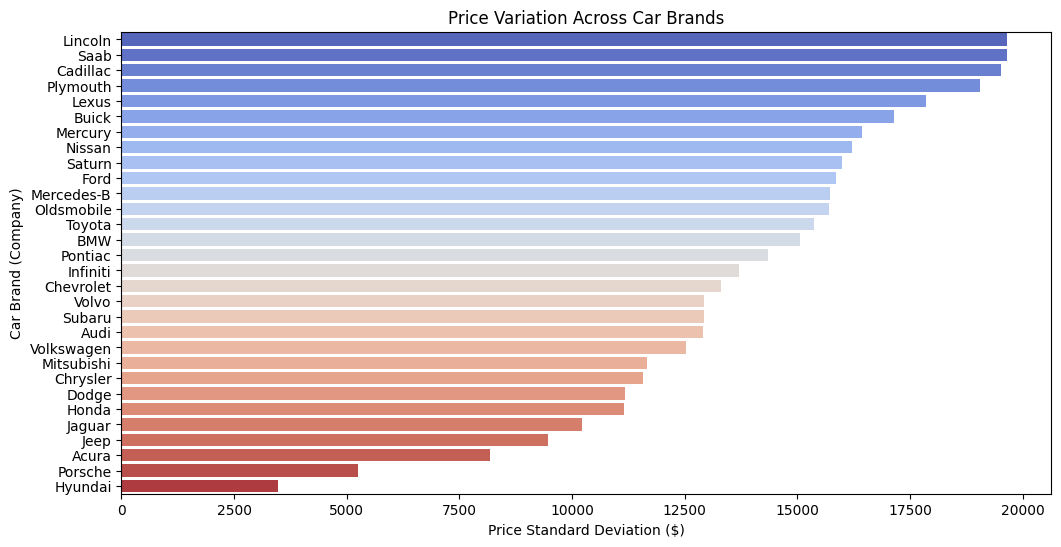

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

# Compute standard deviation of car prices for each company
brand_price_variation = df.groupby('Company')['Price ($)'].std().reset_index()

# Rename column for clarity
brand_price_variation.rename(columns={'Price ($)': 'Price Std Dev'}, inplace=True)

# Sort by highest variation
brand_price_variation = brand_price_variation.sort_values(by='Price Std Dev', ascending=False)

# Display top brands with highest variation
print(brand_price_variation)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Price Std Dev', y='Company', data=brand_price_variation, palette='coolwarm')
plt.xlabel("Price Standard Deviation ($)")
plt.ylabel("Car Brand (Company)")
plt.title("Price Variation Across Car Brands")
plt.show()


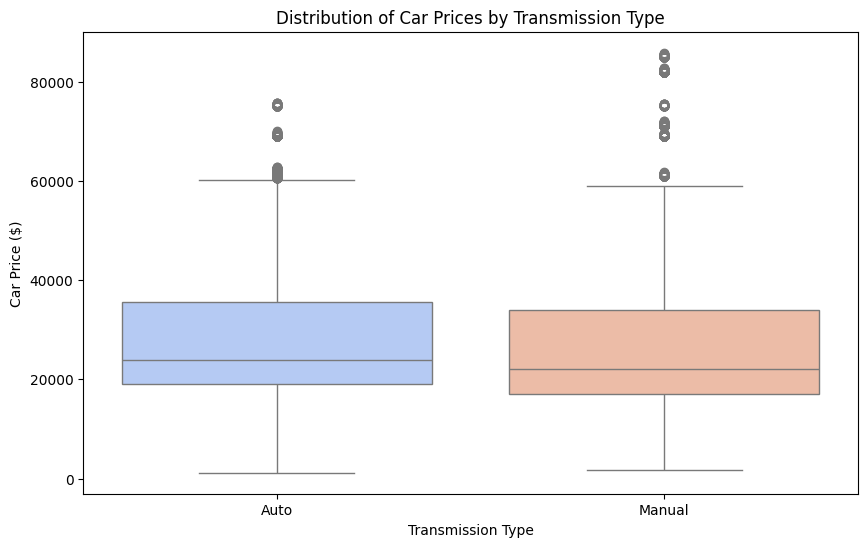

                  25%      50%      75%      IQR
Transmission                                    
Auto          19000.0  24000.0  35500.0  16500.0
Manual        17000.0  22001.0  34000.0  17000.0


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

# Box plot to visualize distribution of car prices by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='coolwarm')
plt.xlabel("Transmission Type")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

# Compute IQR for each transmission type
iqr_summary = df.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]
iqr_summary['IQR'] = iqr_summary['75%'] - iqr_summary['25%']

# Display IQR comparison
print(iqr_summary)

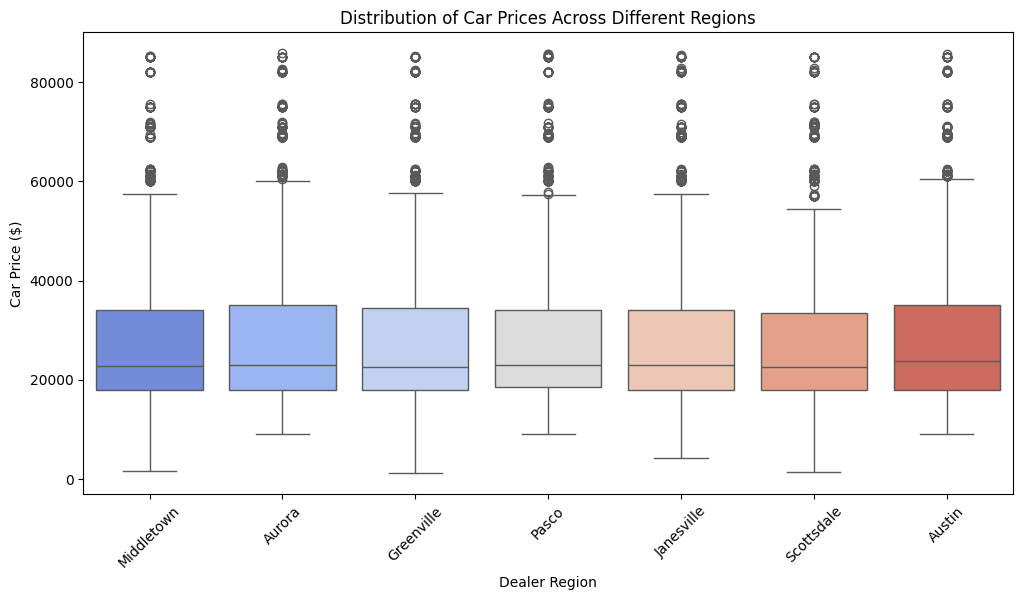

                count          mean      50%     min      max           std
Dealer_Region                                                              
Aurora         3130.0  28334.626837  23000.0  9000.0  85800.0  15026.207252
Austin         4135.0  28341.603628  23801.0  9000.0  85601.0  14903.884549
Greenville     3128.0  28180.819054  22500.0  1200.0  85200.0  15101.538328
Janesville     3821.0  27833.350955  23000.0  4300.0  85400.0  14344.995638
Middletown     3128.0  27856.338875  22750.0  1700.0  85300.0  14619.842395
Pasco          3131.0  28119.039923  23000.0  9000.0  85600.0  14659.315941
Scottsdale     3433.0  27954.958928  22600.0  1450.0  85001.0  14902.916820


In [ ]:
#4.What is the distribution of car prices across different regions

# Box plot to visualize car price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='coolwarm')
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Compute summary statistics for each region
region_price_summary = df.groupby('Dealer_Region')['Price ($)'].describe()

# Display summary statistics
print(region_price_summary[['count', 'mean', '50%', 'min', 'max', 'std']])

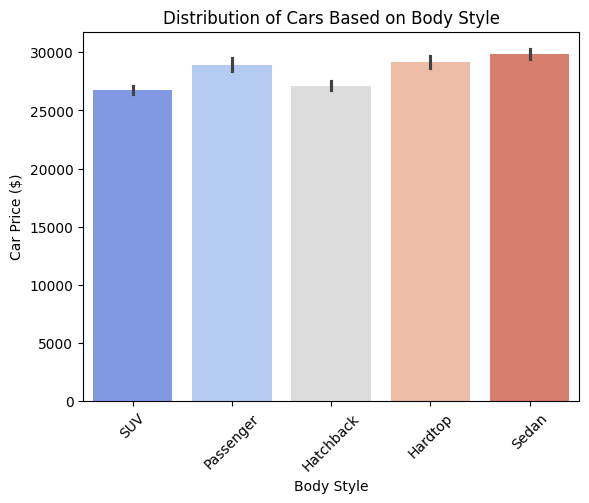

In [ ]:
#5.What is the distribution of cars based on body styles
sns.barplot(x='Body Style', y='Price ($)', data=df, palette='coolwarm')
plt.xlabel("Body Style")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Cars Based on Body Style")
plt.xticks(rotation=45)
plt.show()

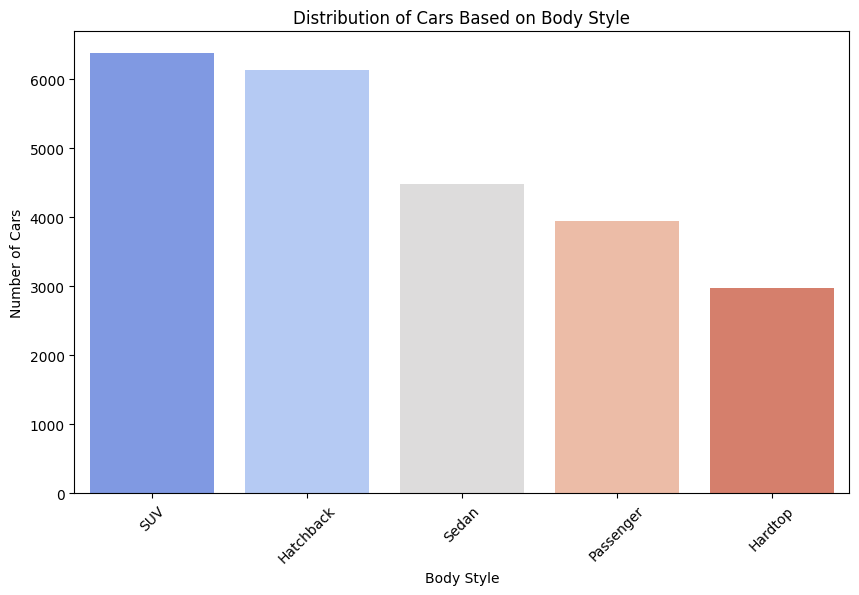

Percentage Distribution of Cars by Body Style:
Body Style
SUV          26.66%
Hatchback    25.63%
Sedan        18.77%
Passenger     16.5%
Hardtop      12.43%
Name: count, dtype: object


In [ ]:
# Count the number of cars by body style
body_style_counts = df['Body Style'].value_counts()

# Compute percentage distribution
body_style_percentage = (body_style_counts / body_style_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="coolwarm")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars Based on Body Style")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Display percentage distribution
print("Percentage Distribution of Cars by Body Style:")
print(body_style_percentage.round(2).astype(str) + "%")

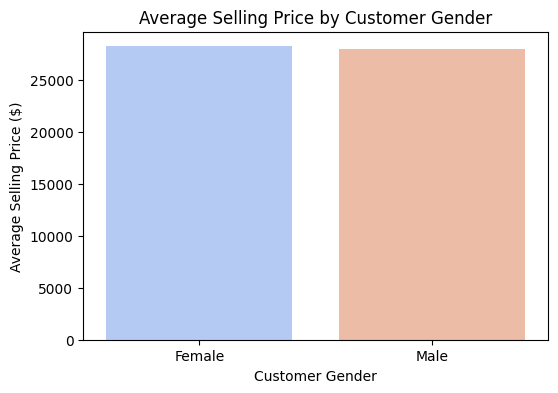

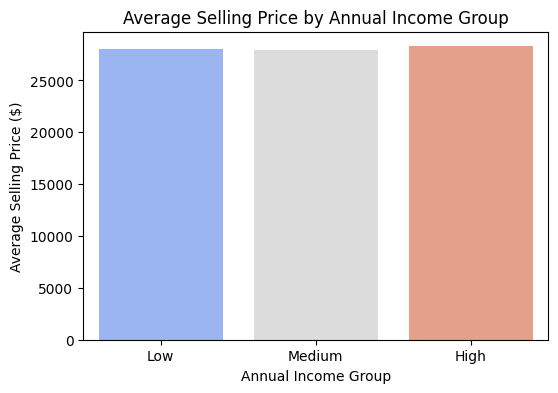

In [ ]:
#6.How does the average selling price of cars vary by customer gender and annual income

# Compute average selling price by gender
gender_price = df.groupby('Gender')['Price ($)'].mean().reset_index()

# Plot gender-wise average price
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Price ($)', data=gender_price, palette="coolwarm")
plt.xlabel("Customer Gender")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by Customer Gender")
plt.show()

# Define income groups (Low, Medium, High) based on quartiles
df['Income Group'] = pd.qcut(df['Annual Income'], q=3, labels=['Low', 'Medium', 'High'])

# Compute average selling price by income group
income_price = df.groupby('Income Group')['Price ($)'].mean().reset_index()

# Plot income-wise average price
plt.figure(figsize=(6, 4))
sns.barplot(x='Income Group', y='Price ($)', data=income_price, palette="coolwarm")
plt.xlabel("Annual Income Group")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by Annual Income Group")
plt.show()


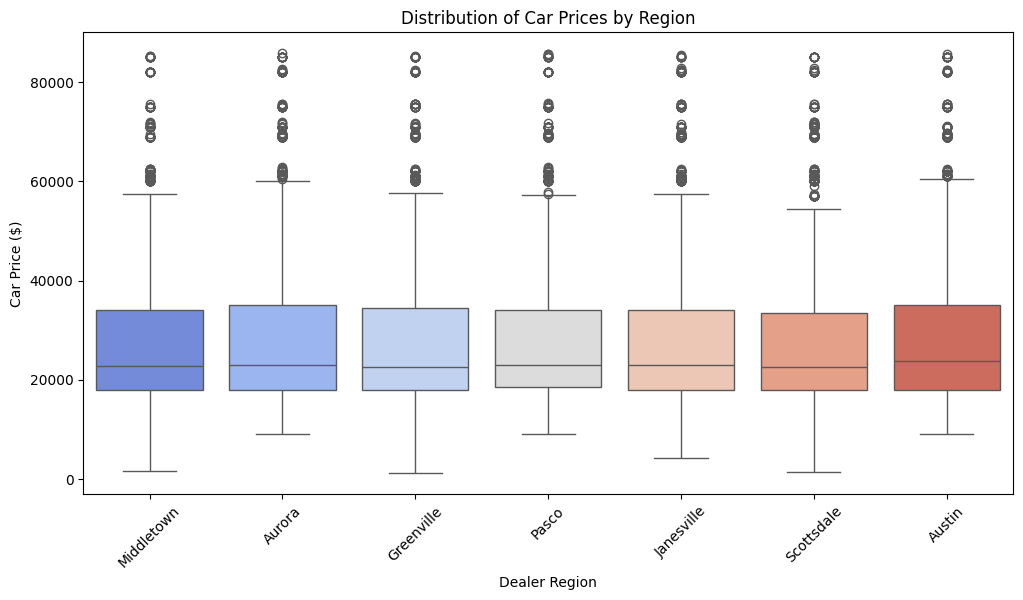

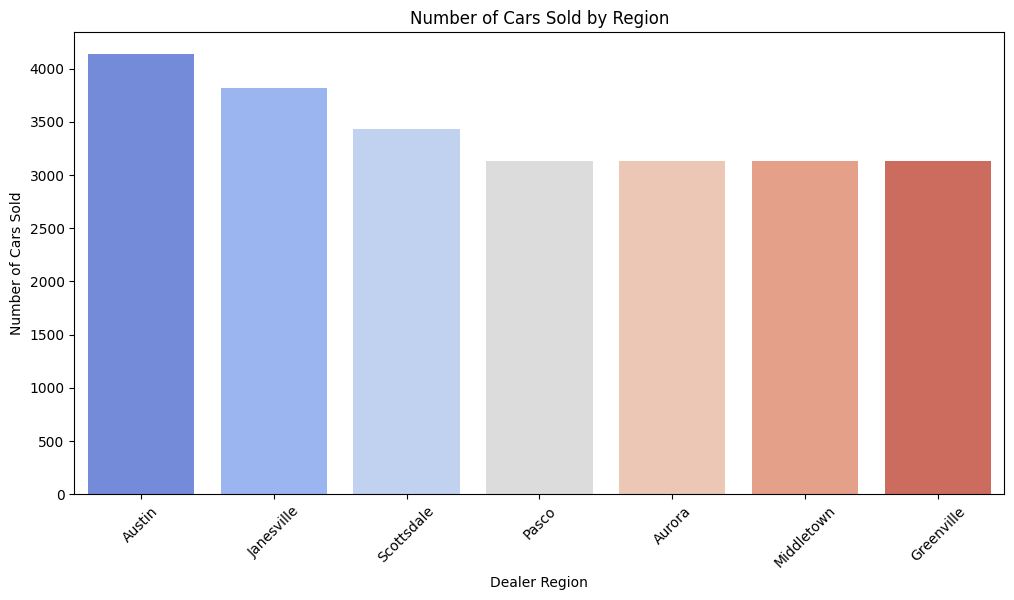

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region
# 1. Box plot for car price distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette="coolwarm")
plt.xlabel("Dealer Region")
plt.ylabel("Car Price ($)")
plt.title("Distribution of Car Prices by Region")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

## 2. Bar plot for number of cars sold by region
region_sales = df['Dealer_Region'].value_counts().reset_index()
region_sales.columns = ['Dealer_Region', 'Cars Sold']

plt.figure(figsize=(12, 6))
sns.barplot(x='Dealer_Region', y='Cars Sold', data=region_sales, palette="coolwarm")
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

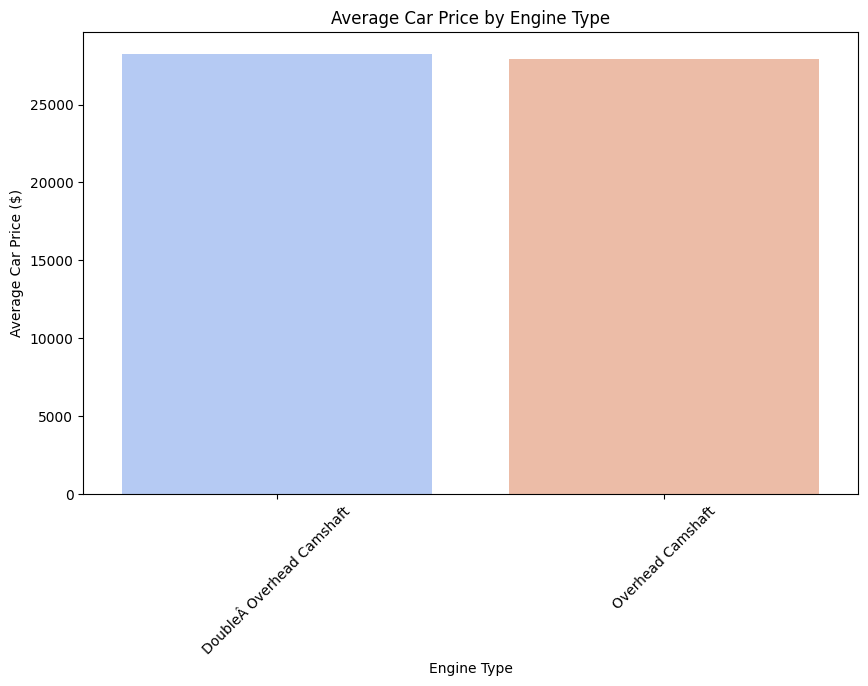

In [ ]:
#8.How does the average car price differ between cars with different engine sizes

# Compute average selling price by engine type
engine_price = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort by price for better visualization
engine_price = engine_price.sort_values(by='Price ($)', ascending=False)

# Plot engine-wise average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Engine', y='Price ($)', data=engine_price, palette="coolwarm")
plt.xlabel("Engine Type")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Engine Type")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


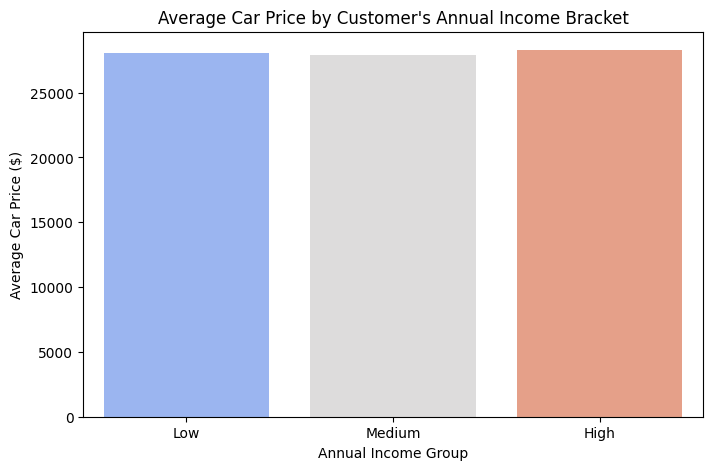

In [ ]:
#9.How do car prices vary based on the customer’s annual income bracket


# Define income groups (Low, Medium, High) based on quartiles (already defined in the previous question)
#df['Income Group'] = pd.qcut(df['Annual Income'], q=3, labels=['Low', 'Medium', 'High'])

# Compute average car price per income group
income_price = df.groupby('Income Group')['Price ($)'].mean().reset_index()

# Plot average car price by income group
plt.figure(figsize=(8, 5))
sns.barplot(x='Income Group', y='Price ($)', data=income_price, palette="coolwarm")
plt.xlabel("Annual Income Group")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Customer's Annual Income Bracket")
plt.show()

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Group'],
      dtype='object')

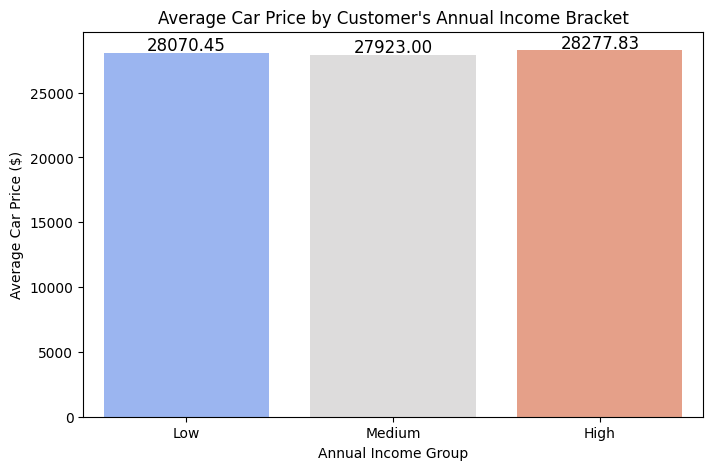

In [ ]:
# Plot average car price by income group
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Income Group', y='Price ($)', data=income_price, palette="coolwarm")

# Add text annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel("Annual Income Group")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price by Customer's Annual Income Bracket")
plt.show()

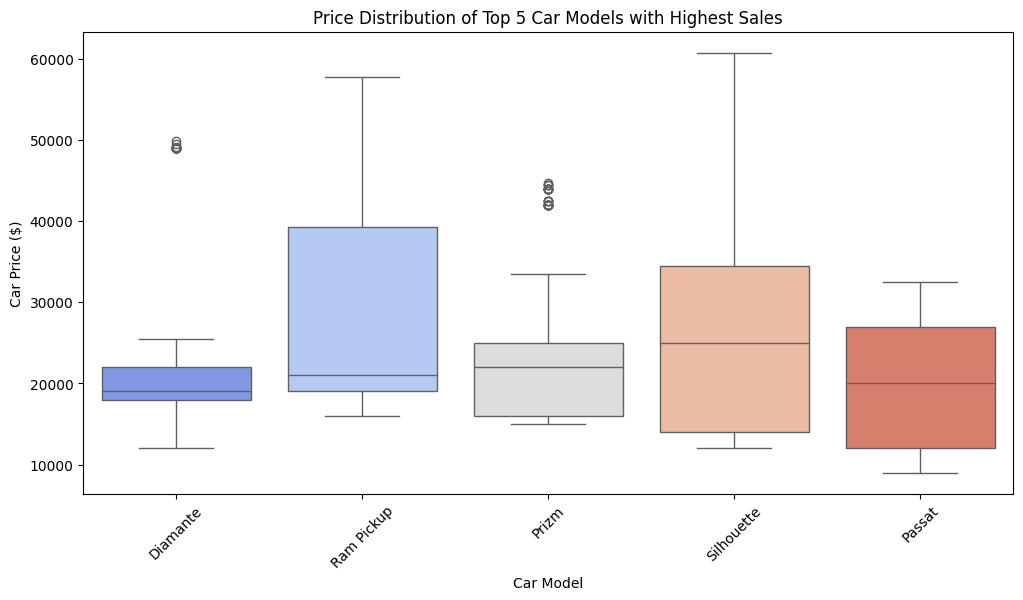

In [ ]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look

# Get the top 5 car models with the highest number of sales
top_models = df["Model"].value_counts(ascending = False).head(5).index

# Filter dataset for these top 5 models
top_models_data = df[df['Model'].isin(top_models)]

# Plot the price distribution of these top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data, palette="coolwarm")
plt.xlabel("Car Model")
plt.ylabel("Car Price ($)")
plt.title("Price Distribution of Top 5 Car Models with Highest Sales")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

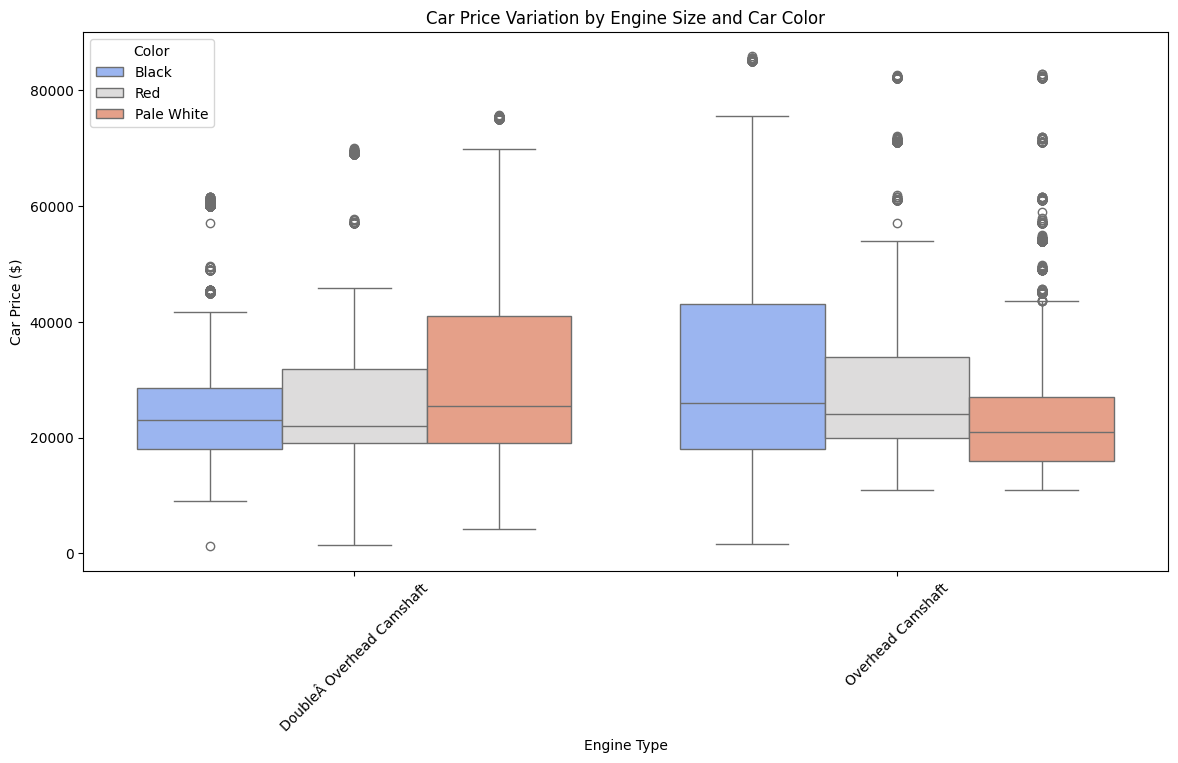

Top Colors with Highest Price Variation:
        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [ ]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation

# Compute the average car price by engine size and color
engine_color_price = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

# Plot price variation by engine size and car color
plt.figure(figsize=(14, 7))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df, palette="coolwarm")
plt.xlabel("Engine Type")
plt.ylabel("Car Price ($)")
plt.title("Car Price Variation by Engine Size and Car Color")
plt.xticks(rotation=45)
plt.show()

# Calculate price variation (std deviation) by color to identify the highest variation
color_price_variation = df.groupby('Color')['Price ($)'].std().reset_index()

# Sort by standard deviation to find colors with the highest variation
color_price_variation = color_price_variation.sort_values(by='Price ($)', ascending=False)

# Display top colors with highest price variation
print("Top Colors with Highest Price Variation:")
print(color_price_variation.head())

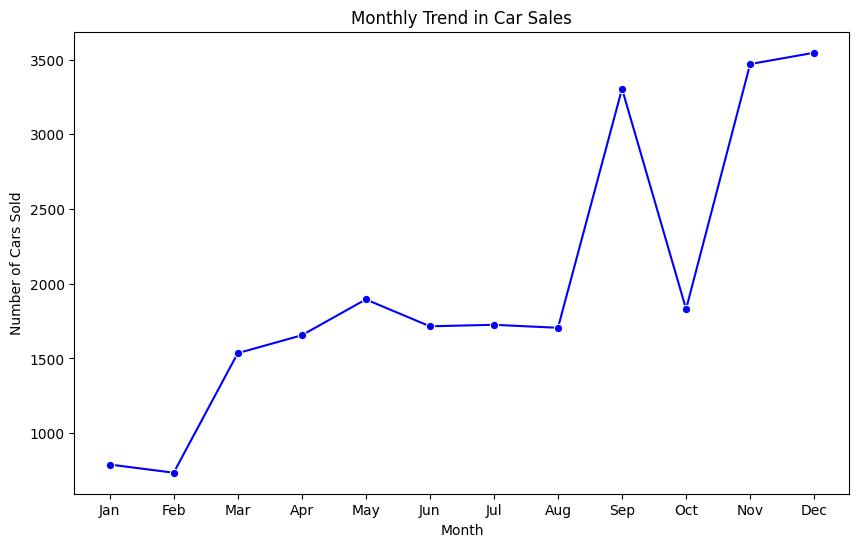

In [ ]:
#12.Is there any seasonal trend in car sales based on the date of sale
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate the number of cars sold per month
monthly_sales = df.groupby('Month')['Car_id'].count().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Car_id', data=monthly_sales, marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Monthly Trend in Car Sales")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


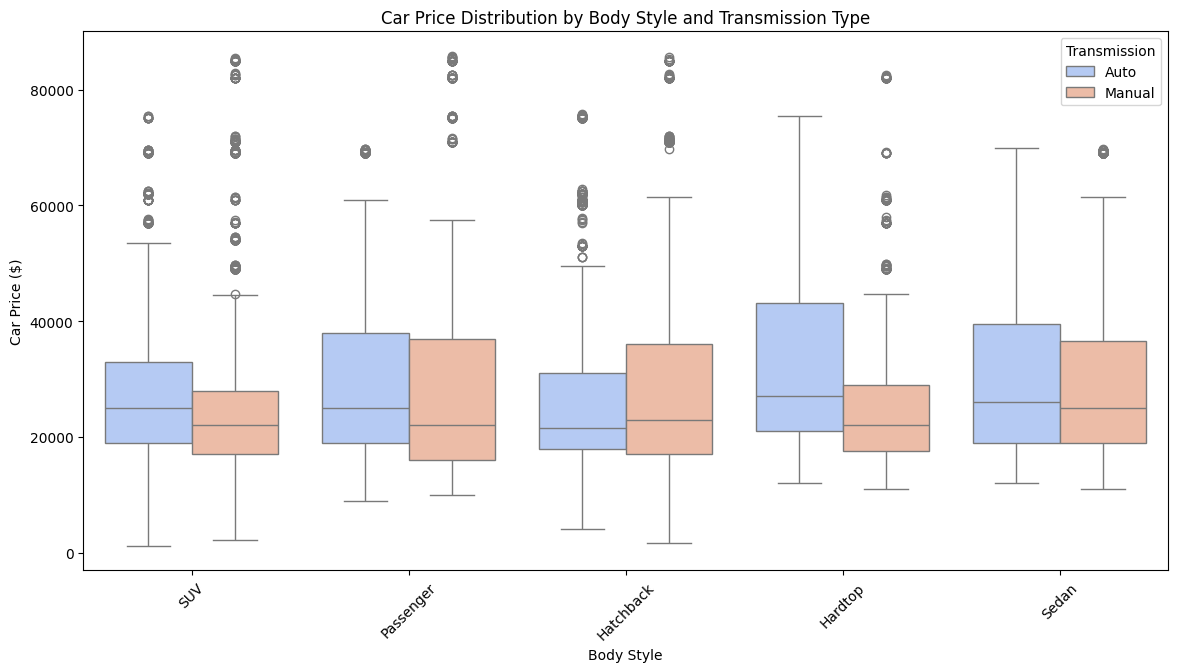

In [ ]:
#13.How does the car price distribution change when considering different combinations of body style and transmission type

# Plot price distribution by body style and transmission type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette="coolwarm")
plt.xlabel("Body Style")
plt.ylabel("Car Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Transmission")
plt.show()

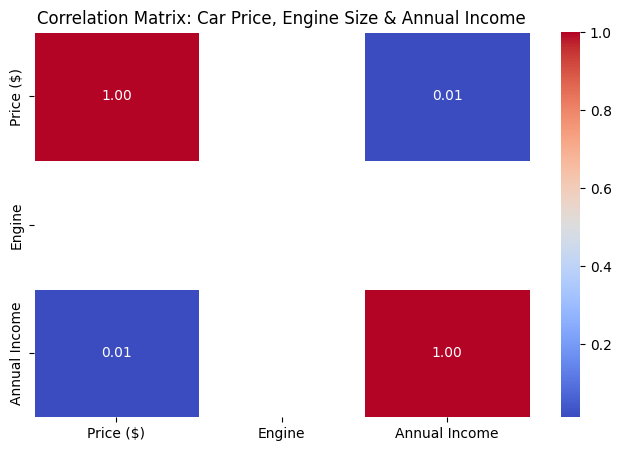

In [ ]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

# Convert categorical Engine column to numerical
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

# Select relevant numeric columns
correlation_features = ['Price ($)', 'Engine', 'Annual Income']

# Compute correlation matrix
corr_matrix = df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Car Price, Engine Size & Annual Income")
plt.show()



In [ ]:
#15.How does the average car price vary across different car models and engine types?

# Convert Engine column to numeric (if necessary)
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)

# Compute average price by model and engine type
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort by price for better visualization
avg_price = avg_price.sort_values(by='Price ($)', ascending=False)



# Pivot the data for heatmap
avg_price_pivot = avg_price.pivot("Model", "Engine", "Price ($)")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_price_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given